In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# https://drive.google.com/file/d/1AHDpFkYorbWR94fPGLqvgB5Qf9c90gt4/view?usp=sharing
fileDownloaded1 = drive.CreateFile({'id':'1AHDpFkYorbWR94fPGLqvgB5Qf9c90gt4'})
fileDownloaded1.GetContentFile('training.1600000.processed.noemoticon.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import re
import spacy
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english')) # stopwords 

In [ ]:
columns = ["TARGET","ID","DATE","IS_QUERY","USER","TWEET"]
df = pd.read_csv('training.1600000.processed.noemoticon.csv', names = columns, encoding='latin-1')

In [ ]:
df.head()

,TARGET,ID,DATE,IS_QUERY,USER,TWEET
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.isnull().sum()

TARGET      0
ID          0
DATE        0
IS_QUERY    0
USER        0
TWEET       0
dtype: int64

In [ ]:
df.describe()

,TARGET,ID
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


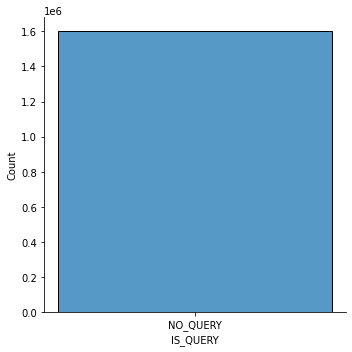

In [ ]:
sns.displot(data=df,x=df["IS_QUERY"])
plt.show()

In [ ]:
df.shape

(1600000, 6)

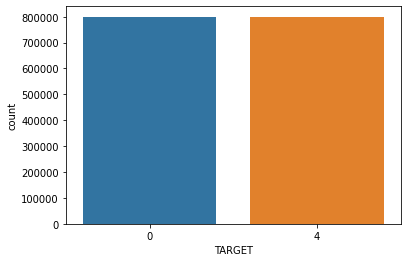

In [ ]:
sns.countplot(data= df,x='TARGET')
plt.show()

In [ ]:
temp = df.groupby('TARGET').count()['TWEET'].reset_index().sort_values(by='TWEET',ascending=False)
temp.style.background_gradient(cmap='Purples')

,TARGET,TWEET
0,0,800000
1,4,800000


In [ ]:
df = df.dropna(axis = 0, how='any')

In [ ]:
#creating new empty list
cleaned_tweet = []

In [ ]:
#lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
lemmatize_word = WordNetLemmatizer()
word_stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Removal of Emoticons
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)
df["TWEET"] = df["TWEET"].apply(lambda text: remove_emoticons(text))

In [ ]:
df.head()

,TARGET,ID,DATE,IS_QUERY,USER,TWEET
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http/twitpic.com/2y1zl - Awww, tha..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
def f(text, dict):
    for word in text.split():
        if word.lower() in dict:
            if word.lower() in text.split():
                text = text.replace(word, dict[word.lower()])
    return text

In [ ]:
abbrevation = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}
df['CLEAN_TWEET'] = df['TWEET'].apply(lambda x: f(x,abbrevation))

In [ ]:
def remove_user(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
# df["CLEAN_TWEET"] = df["TWEET"].str.replace('@[\w]*','')
df["CLEAN_TWEET"] = np.vectorize(remove_user)(df['CLEAN_TWEET'], "@[\w]*")
df["CLEAN_TWEET"] = df["CLEAN_TWEET"].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

# df["CLEAN_TWEET"] = df["CLEAN_TWEET"].str.replace('[^a-zA-Z]',' ')

In [ ]:
df["CLEAN_TWEET"] = df["CLEAN_TWEET"].str.replace('[^a-zA-Z]',' ')
df['CLEAN_TWEET'] = df['CLEAN_TWEET'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [ ]:
def token(text):
    text = text.lower().split()
    return text
df["TWEET_TOKEN"] = df["CLEAN_TWEET"].apply(token)

In [ ]:
df.head()

,TARGET,ID,DATE,IS_QUERY,USER,TWEET,CLEAN_TWEET,TWEET_TOKEN
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http/twitpic.com/2y1zl - Awww, tha...",http twitpic com zl Awww that bummer You shoul...,"[http, twitpic, com, zl, awww, that, bummer, y..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can update his Facebook by te...,"[is, upset, that, he, can, update, his, facebo..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times for the ball Managed to save ...,"[dived, many, times, for, the, ball, managed, ..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it not behaving at all mad why am here beca...,"[no, it, not, behaving, at, all, mad, why, am,..."


In [ ]:
print(stop_words)

{'doesn', 'if', 'do', "wouldn't", 'from', "you'd", 'yourself', 'nor', 'hadn', 'hasn', 'haven', 'itself', 'for', 'my', 'won', 'needn', 'being', 'had', 'of', 'between', 'our', 'there', 'wouldn', 'some', 'and', 'it', 'don', 'was', 'or', 've', 'doing', "shan't", 'll', 'hers', "weren't", 'up', "aren't", 'couldn', 'me', 'she', 'not', 'that', 'more', 'yours', 'which', 'theirs', 'under', 'here', 'ain', 'them', 'too', 'an', 'myself', 'to', 'himself', 'his', 'd', "isn't", 'how', "you've", 'ourselves', 'wasn', 'any', 'such', 'few', 'than', 'while', 'at', 'until', 'each', 'most', "hasn't", 'themselves', 'again', 'as', 'isn', 'this', 'shan', 'are', 'were', 'those', 'herself', "shouldn't", 's', 'mustn', 'during', 'further', 'have', "didn't", "mightn't", 'on', 'what', "it's", 'weren', 'above', 'same', 'he', 'her', 'into', 'should', "mustn't", 'after', 'the', 'o', 'has', 'shouldn', 'been', 'having', 'is', 'be', 'but', 'will', 'own', 'aren', "don't", 'then', 'm', 'your', 'out', 'you', "wasn't", 'am', '

In [ ]:
df["NEW_TOKEN"] = df["TWEET_TOKEN"].apply(lambda x : [word for word in x if not word in stop_words])

In [ ]:
df.head()

,TARGET,ID,DATE,IS_QUERY,USER,TWEET,CLEAN_TWEET,TWEET_TOKEN,NEW_TOKEN
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http/twitpic.com/2y1zl - Awww, tha...",http twitpic com zl Awww that bummer You shoul...,"[http, twitpic, com, zl, awww, that, bummer, y...","[http, twitpic, com, zl, awww, bummer, shoulda..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can update his Facebook by te...,"[is, upset, that, he, can, update, his, facebo...","[upset, update, facebook, texting, might, cry,..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times for the ball Managed to save ...,"[dived, many, times, for, the, ball, managed, ...","[dived, many, times, ball, managed, save, rest..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it not behaving at all mad why am here beca...,"[no, it, not, behaving, at, all, mad, why, am,...","[behaving, mad, see]"


In [ ]:
# # df['NEW_TWEET'] = df['TWEET'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
# for i in df['TWEET']:
#     TWEET = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ',i)
#     TWEET = re.sub('[^a-zA-Z]',' ',TWEET)
#     TWEET = TWEET.lower().split()
#     # print(TWEET)
#     # break
#     NEW_TWEET = []
#     for word in TWEET:
#         if word not in stop_words:
#             lemmatize_word.lemmatize(word)
#             NEW_TWEET.append(word)
#     # TWEET = [lemmatize_word.lemmatize(word) for word in TWEET(if word not in stop_words)]
#     TWEET = ' '.join(NEW_TWEET)
#     # print(TWEET)
#     # break
#     cleaned_tweet.append(TWEET)

In [ ]:
def lemmitize(text):
    l = []
    for word in text:
        l.append(lemmatize_word.lemmatize(word))
    # print(text)
    return l
df["LEMMITIZE_NEW_TOKEN"] = df["NEW_TOKEN"].apply(lemmitize)

In [ ]:
df.head()

,TARGET,ID,DATE,IS_QUERY,USER,TWEET,CLEAN_TWEET,TWEET_TOKEN,NEW_TOKEN,LEMMITIZE_NEW_TOKEN
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http/twitpic.com/2y1zl - Awww, tha...",http twitpic com zl Awww that bummer You shoul...,"[http, twitpic, com, zl, awww, that, bummer, y...","[http, twitpic, com, zl, awww, bummer, shoulda...","[http, twitpic, com, zl, awww, bummer, shoulda..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can update his Facebook by te...,"[is, upset, that, he, can, update, his, facebo...","[upset, update, facebook, texting, might, cry,...","[upset, update, facebook, texting, might, cry,..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times for the ball Managed to save ...,"[dived, many, times, for, the, ball, managed, ...","[dived, many, times, ball, managed, save, rest...","[dived, many, time, ball, managed, save, rest,..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]","[whole, body, feel, itchy, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it not behaving at all mad why am here beca...,"[no, it, not, behaving, at, all, mad, why, am,...","[behaving, mad, see]","[behaving, mad, see]"


In [ ]:
#wordcloud
def show_wordcloud(text):
    word_cloud = WordCloud().generate(text)
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(word_cloud, interpolation='bicubic')
    plt.axis("off")
    plt.show()

In [ ]:
def join(text):
    return ' '.join(text)
df['LEMMITIZE_NEW_TOKEN'] = df['LEMMITIZE_NEW_TOKEN'].apply(join)
df.head()

,TARGET,ID,DATE,IS_QUERY,USER,TWEET,CLEAN_TWEET,TWEET_TOKEN,NEW_TOKEN,LEMMITIZE_NEW_TOKEN
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http/twitpic.com/2y1zl - Awww, tha...",http twitpic com zl Awww that bummer You shoul...,"[http, twitpic, com, zl, awww, that, bummer, y...","[http, twitpic, com, zl, awww, bummer, shoulda...",http twitpic com zl awww bummer shoulda got da...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can update his Facebook by te...,"[is, upset, that, he, can, update, his, facebo...","[upset, update, facebook, texting, might, cry,...",upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times for the ball Managed to save ...,"[dived, many, times, for, the, ball, managed, ...","[dived, many, times, ball, managed, save, rest...",dived many time ball managed save rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]",whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it not behaving at all mad why am here beca...,"[no, it, not, behaving, at, all, mad, why, am,...","[behaving, mad, see]",behaving mad see


68834575


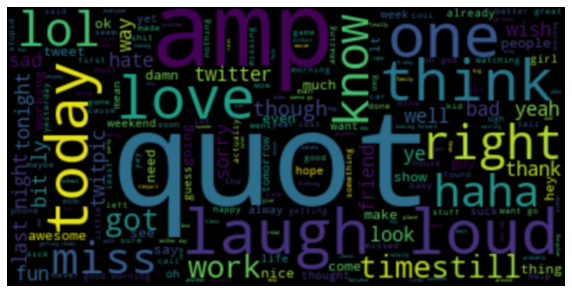

In [ ]:
total_words = ' '.join([text for text in df['LEMMITIZE_NEW_TOKEN']])
print(len(total_words))
new = ('%.50000000s' % total_words)
# print(new)
show_wordcloud(new)

34661186


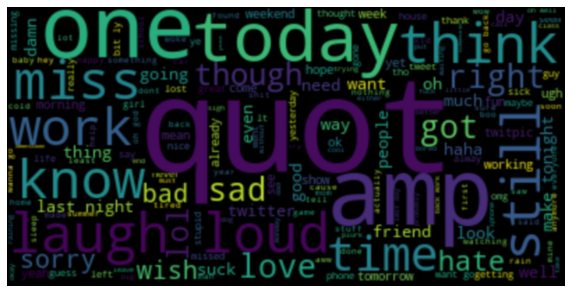

In [ ]:
sad_words =' '.join([text for text in df['LEMMITIZE_NEW_TOKEN'][df['TARGET'] == 0]])
print(len(sad_words))
show_wordcloud(sad_words)

34173388


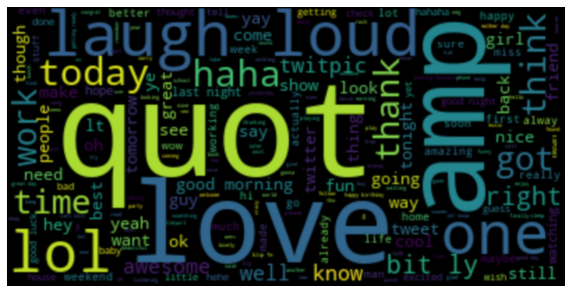

In [ ]:
happy_words =' '.join([text for text in df['LEMMITIZE_NEW_TOKEN'][df['TARGET'] == 4]])
print(len(happy_words))
show_wordcloud(happy_words)

In [ ]:
!pip install pyspellchecker

     |████████████████████████████████| 2.7MB 28.5MB/s 


In [ ]:
# from spellchecker import SpellChecker
# spell = SpellChecker()
# # cleaned_corrected = []
# def correct_spellings(text):
#     blob = TextBlob(str(text))
#     blob.correct()
#     return blob
# df["LEMMITIZE_NEW_TOKEN"] = df["LEMMITIZE_NEW_TOKEN"].apply(correct_spellings)

In [ ]:
df.head()

,TARGET,ID,DATE,IS_QUERY,USER,TWEET,CLEAN_TWEET,TWEET_TOKEN,NEW_TOKEN,LEMMITIZE_NEW_TOKEN
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http/twitpic.com/2y1zl - Awww, tha...",http twitpic com zl Awww that bummer You shoul...,"[http, twitpic, com, zl, awww, that, bummer, y...","[http, twitpic, com, zl, awww, bummer, shoulda...",http twitpic com zl awww bummer shoulda got da...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can update his Facebook by te...,"[is, upset, that, he, can, update, his, facebo...","[upset, update, facebook, texting, might, cry,...",upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times for the ball Managed to save ...,"[dived, many, times, for, the, ball, managed, ...","[dived, many, times, ball, managed, save, rest...",dived many time ball managed save rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]",whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it not behaving at all mad why am here beca...,"[no, it, not, behaving, at, all, mad, why, am,...","[behaving, mad, see]",behaving mad see


In [ ]:
# X = pd.DataFrame()
# Y = df['TARGET']
# X.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cnt = CountVectorizer(max_features =1000, stop_words='english',max_df=0.9,min_df=2)
#  = cnt.fit_transform(cleaned_tweet).toarray()
cnt

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=1000, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
bag_of_words_lemmmitize = cnt.fit_transform(df["LEMMITIZE_NEW_TOKEN"]) 
# bag_of_words_lemmmitize_array = bag_of_words_lemmmitize.toarray()
bag_of_words_lemmmitize

<1600000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6462299 stored elements in Compressed Sparse Row format>

In [ ]:
count_list = bag_of_words_lemmmitize.sum(axis=0)
count_list

matrix([[  5467,   2247,   3267,   1741,   9808,   1481,   4706,   4226,
           2554,   5426,   3237,   5308,   2035,   3214,   2607,   1835,
           3209,   2416,   3886,   1927,   2310,  11811,   1519,  48751,
           1558,   2189,   2859,   6641,   1989,   2748,   2562,   1658,
           1552,   1905,   1974,   3748,   1843,   4246,   3246,   4264,
           4606,   3767,  12306,  18292,   1746,   8401,   5619,   1690,
           2568,  11472,   1520,  27332,   1451,   2161,   2107,   3247,
           1553,   2122,   1971,   2397,   2717,   5979,   2657,   8275,
          22376,   2830,   7325,  17000,   2824,  23164,  11265,   2439,
           1816,  10570,  24840,   2313,   3064,   1624,   1671,   1530,
           3329,   5654,   1725,   1769,   2787,   2752,   5288,   7765,
          10589,   4453,   4304,   3617,   2346,   8403,   3320,   1643,
           5160,   4559,   4158,   2104,   4335,   3128,   6101,   3321,
           1739,   1734,   1811,   1539,   1443,   

In [ ]:
features = cnt.get_feature_names()
features

['able',
 'absolutely',
 'account',
 'ache',
 'actually',
 'adam',
 'add',
 'afternoon',
 'age',
 'ago',
 'agree',
 'ah',
 'ahead',
 'ahh',
 'ahhh',
 'aint',
 'air',
 'airport',
 'album',
 'alot',
 'alright',
 'amazing',
 'american',
 'amp',
 'angel',
 'annoying',
 'answer',
 'anymore',
 'app',
 'apparently',
 'apple',
 'appreciate',
 'argh',
 'arm',
 'art',
 'ask',
 'asked',
 'asleep',
 'ate',
 'aw',
 'awake',
 'award',
 'away',
 'awesome',
 'awful',
 'aww',
 'awww',
 'awwww',
 'babe',
 'baby',
 'background',
 'bad',
 'badly',
 'bag',
 'ball',
 'band',
 'bank',
 'bar',
 'bb',
 'bbq',
 'bday',
 'beach',
 'beat',
 'beautiful',
 'bed',
 'beer',
 'believe',
 'best',
 'bet',
 'better',
 'big',
 'bike',
 'bird',
 'birthday',
 'bit',
 'bitch',
 'black',
 'blackberry',
 'blah',
 'bless',
 'blip',
 'blog',
 'blood',
 'bloody',
 'blue',
 'body',
 'boo',
 'book',
 'bored',
 'boring',
 'bought',
 'bout',
 'box',
 'boy',
 'boyfriend',
 'brain',
 'break',
 'breakfast',
 'bring',
 'bro',
 'broke',
 

In [ ]:
# cnt._validate_vocabulary()
# print('cnt.get_feature_names(): {0}'.
#   format(cnt.get_feature_names()))

In [ ]:
# df_bag_of_words = pd.DataFrame(data = bag_of_words_lemmmitize, columns = features)

In [ ]:
X = bag_of_words_lemmmitize[:1000000,:]

# print(X[5:,:])
Y = df.iloc[:1000000,0:1]
Y.head()

,TARGET
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train_x, valid_x, train_y, valid_y = train_test_split(X,Y,test_size=0.3,random_state = 19, shuffle = True)

In [ ]:
# train_x_dense = train_x.todense()
valid_x_dense = valid_x.toarray()
valid_x_dense

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
Bayes_model = MultinomialNB()
Bayes_model.fit(train_x,train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = Bayes_model.predict(valid_x)
print(accuracy_score(valid_y,y_pred) * 100)

100.0


In [ ]:
# from sklearn.naive_bayes import CategoricalNB
# CNB_model = CategoricalNB()
# CNB_model.fit(train_x.toarray(),train_y)

In [ ]:
# y_predict_CNB_model = CNB_model.predict(valid_x_dense)
# print(accuracy_score(valid_y,y_predict_CNB_model))

In [ ]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# LDA_model = LinearDiscriminantAnalysis()
# LDA_model.fit(train_x.toarray(),train_y)

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# Gauss_model = GaussianNB()
# Gauss_model.fit(train_x_dense,train_y)

In [ ]:
# y_predict_Gauss_model = Gauss_model.predict(valid_x)
# print(accuracy_score(valid_y,y_predict_Gauss_model))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(weights='distance', n_neighbors=4, n_jobs=-1)
KNN_model.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [ ]:
y_predict_KNN_model = KNN_model.predict(valid_x)
print(accuracy_score(valid_y,y_predict_KNN_model))

1.0


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# DTC_model = DecisionTreeClassifier()

In [ ]:
# DTC_model.fit(train_x,train_y)

In [ ]:
# y_predict_DTC_model.predict(valid_x)
# print(accuracy_score(valid_y,y_predict_DTC_model))

In [ ]:
# from sklearn.neural_network import MLPClassifier
# MLP_model = MLPClassifier()

In [ ]:
# MLP_model.fit(train_x,train_y)

In [ ]:
# y_predict_MLP_model = MLP_model.predict(valid_x)
# print(accuracy_score(valid_y,y_predict_MLP_model))

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic_regression_model = LogisticRegression()

In [ ]:
Logistic_regression_model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_Logistic_regression_model = Logistic_regression_model.predict_proba(valid_x)
print(y_Logistic_regression_model)
# prediction_int = y_Logistic_regression_model[:,1] >= 0.3
y_predict_Logistic_regression_model = []
for  i in  y_Logistic_regression_model:
    if i[1] > 0.3:
        y_predict_Logistic_regression_model.append(4)
    else:
        y_predict_Logistic_regression_model.append(0)
print(y_predict_Logistic_regression_model)
# y_predict_Logistic_regression_model = y_predict_Logistic_regression_model.astype(np.int)

[[0.83776282 0.16223718]
 [0.93126512 0.06873488]
 [0.95517216 0.04482784]
 ...
 [0.94164756 0.05835244]
 [0.91295688 0.08704312]
 [0.84212881 0.15787119]]
[0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(accuracy_score(valid_y,y_predict_Logistic_regression_model))

0.80653
